## The Problem & The Plan
https://www.kaggle.com/datasets/camnugent/california-housing-prices/data

The dataset we are given is from Kaggle-- it is a real-world dataset from historical California housing data:

*The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.*

We'll take a look at this data to ultimately create a model that will predict the median home price for a given district.  This will involve properly implementing the dataset into this notebook, cleaning the data and preparation for analysis, exploratory data analysis, and feature engineering.  We'll then build a few models, evaluate them, and determine what insights this investigation provides.

In [1]:
# # Kaggle notebook version of import
# import warnings
# warnings.filterwarnings('ignore')
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# !pip install folium
# import folium
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
# Personal notebook import
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install folium
import folium
from folium.plugins import MarkerCluster

Defaulting to user installation because normal site-packages is not writeable


## Data Collection

In [3]:
# # Kaggle notebook version of loading the dataset
# df=pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

In [4]:
# Personal notebook version of loading the dataset
data=pd.read_csv("housing.csv")

No errors or issues.  Always a good sign.

## Exploratory Data Analysis

Let's take a look at how much data there is.  We'll also take a look at the columns as a starting place to see what data has been collected (or at least attempted to be collected):

In [5]:
print(data.shape)
cols = data.columns
print(cols)

(20640, 10)
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


There are more than 20,000 individual housing groups/tracts that were included in this dataset.  That's a solid number.  

Looks like we've got some geographic identification in the form of latitude-longitude coordinates.  We can use folium to visualize the extent of the data-- perhaps it isn't statewide.  At the very least, we can see where the sampled housing sets are located.

In [6]:
long = data['longitude'].max()
lat = data['latitude'].mean()
m = folium.Map(location=[lat,long], zoom_start=6)
display(m)

In [7]:
marker_cluster = folium.plugins.MarkerCluster().add_to(m)
for idx in data.index:
    folium.Marker([data['latitude'].iloc[idx],
               data['longitude'].iloc[idx]]).add_to(marker_cluster)
display(m)

Next, let's look at some of the individual entries, and we'll also look at the basic statistical analysis and general description of the data in each category/column using head, describe, and info methods for this dataframe.

In [8]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [9]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Most of the data is in numeric form, all but `ocean_proximity`, so we'll look at how to deal with that.  To start, however, let's plot the distributions (histograms) of all values to see how the numeric values are distributed.

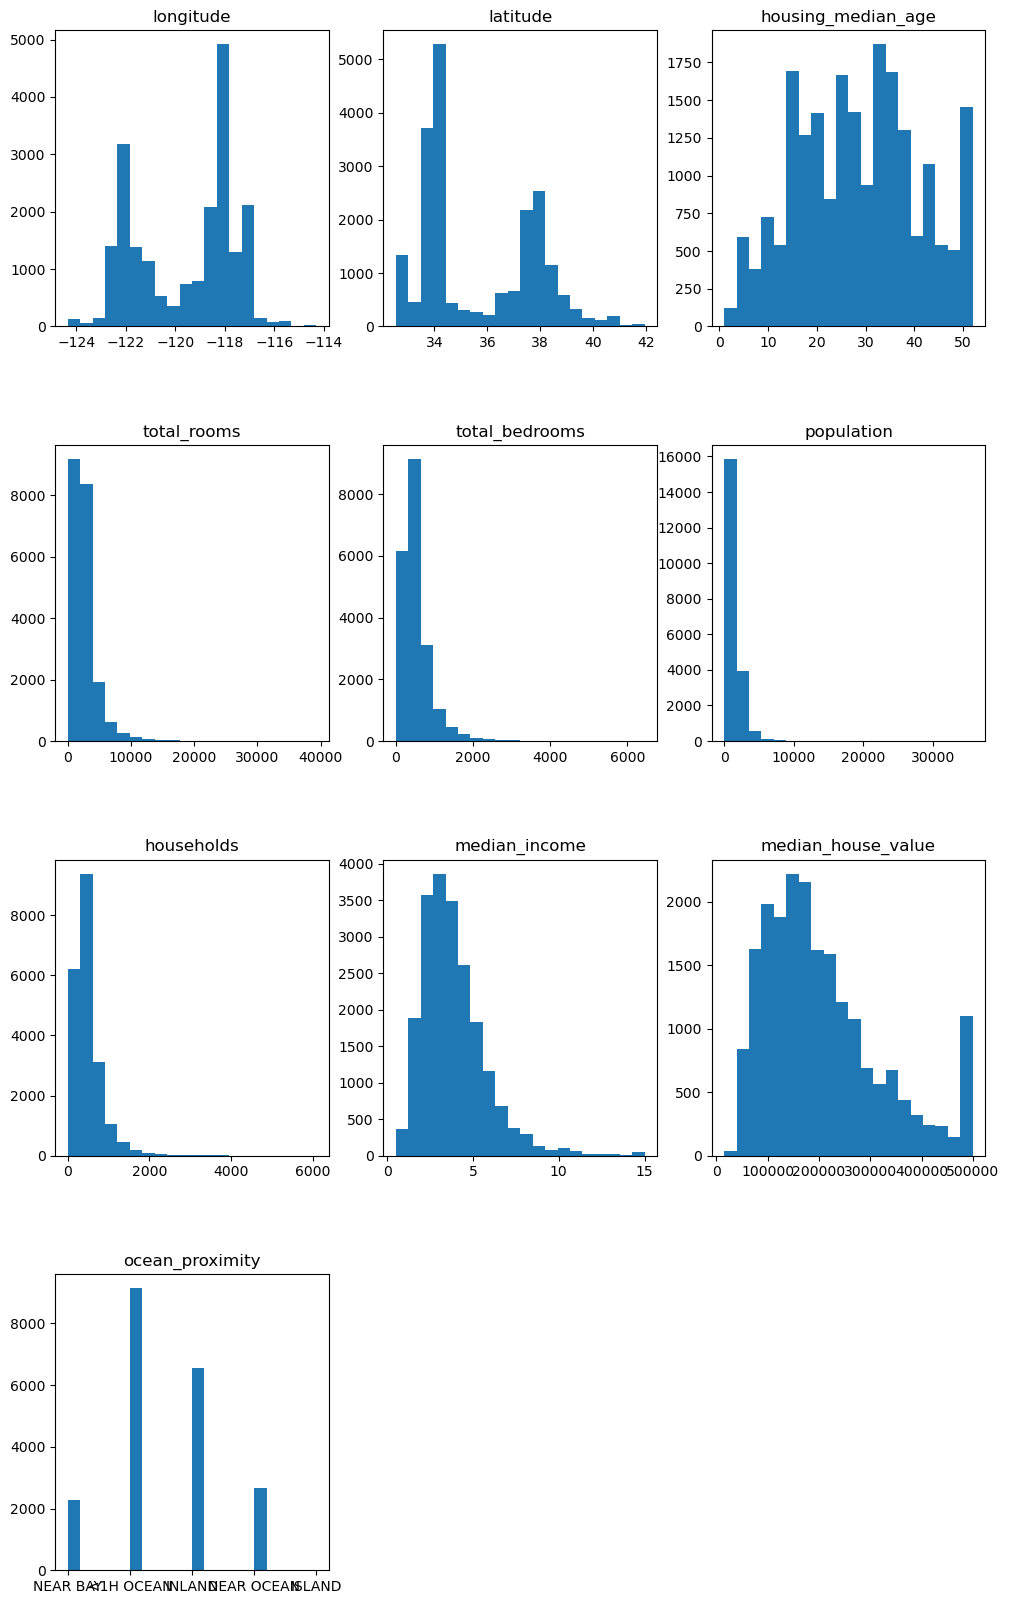

In [11]:
# Create three columns of subplots
vert_plots = 3
# Create a number of rows of subplots based on how many columns are in the dataset.
hor_plots = data.shape[1] // vert_plots
# Create the plots in a grid
if data.shape[1] % hor_plots > 0:
    hor_plots = data.shape[1] // vert_plots + 1
plt.figure(figsize=(12,20))
plt.subplots_adjust(hspace=0.4)
col_idx = 0
for vert_plot in range(vert_plots):
    for hor_plot in range(hor_plots):
        if col_idx >= len(cols):
            continue
        col = cols[col_idx]
        plt.subplot(hor_plots,vert_plots,col_idx+1)
        plt.hist(data[col], bins=20)
        col_idx += 1
        ax = plt.gca()
        ax.set_title(col)

The distributions are mixed.  `housing_median_age` is approaching a uniform distribution.  The other numeric ones are skewed to the right.  We'll want to think about if/how we scale these values before building any models.  Let's also look at the box plots to get a better idea of the outliers.

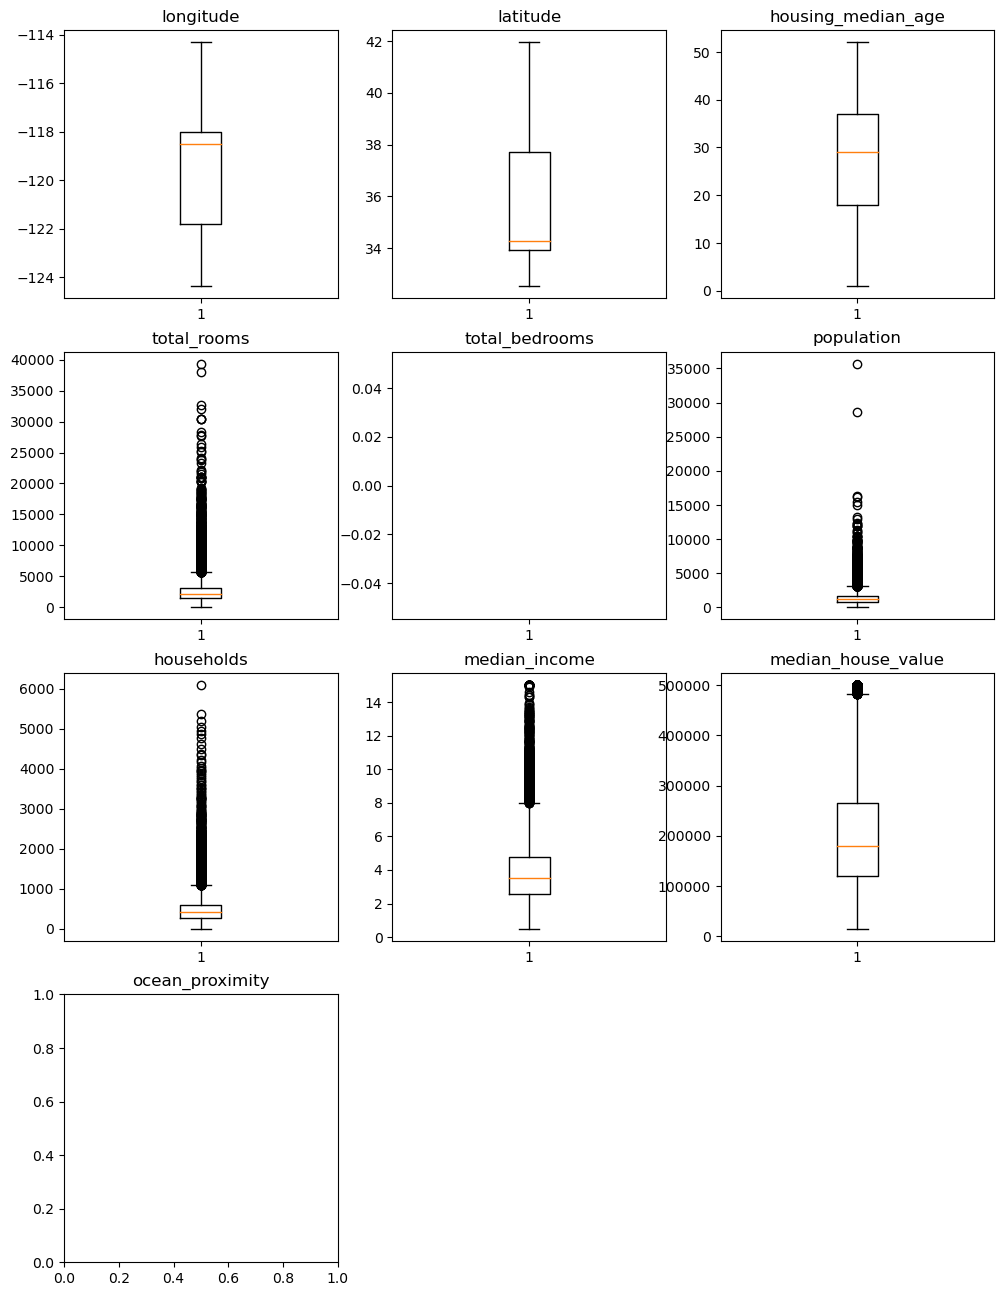

In [12]:
# Box plots, which won't include ocean proximity
vert_plots = 3
hor_plots = data.shape[1] // vert_plots
if data.shape[1] % hor_plots > 0:
    hor_plots = data.shape[1] // vert_plots + 1
plt.figure(figsize=(12,16))
plt.subplots_adjust(hspace=0.2)
col_idx = 0
for vert_plot in range(vert_plots):
    for hor_plot in range(hor_plots):
        if col_idx >= len(cols):
            continue
        col = cols[col_idx]
        plt.subplot(hor_plots,vert_plots,col_idx+1)
        try:
            plt.boxplot(data[col])
        except:
            pass
        ax = plt.gca()
        ax.set_title(col)
        col_idx += 1

#### Missing Values

We're missing any information on `ocean_proximity` due to its categorical nature, as expected, but we are also missing a box plot for `total_bedrooms`.  This may be due to missing data; we'll check:

In [13]:
print('Total number of missing values:',data.isnull().sum())
null_rows = data[data.isnull().any(axis=1)]
data_notnull = data.drop(index=null_rows.index)

Total number of missing values: longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


There are a relatively small number of rows with missing data, all with regard to total bedrooms as we suspected.  We could likely simply delete these rows, but I will elect to impute values for them and add a feature that indicates this value was missing, so we at least preserve this aspect of the item.  For imputatation, a few options seem apporpriate, given this is a category with discrete values and is likely correlated with the total number of rooms.  Let's check the correlation between total bedrooms and all other features to start.

In [14]:
corr_matrix=data_notnull.corr()
corr_matrix['total_bedrooms'].sort_values(ascending=False)

total_bedrooms        1.000000
households            0.979728
total_rooms           0.930380
population            0.877747
longitude             0.069608
median_house_value    0.049686
median_income        -0.007723
latitude             -0.066983
housing_median_age   -0.320451
Name: total_bedrooms, dtype: float64

Interestingly, the highest correlation to total_bedrooms was with regard to households.  This is somewhat intuitive as one would expect that housing tracts have homes with similar number of bedrooms, and the more households there are in a given area, we would see a mean value emerge as something close to the total number of bedrooms for most houses in those areas.  Let's impute the number of total_bedrooms based on its relationship to total households.  We'll work with non-missing data, obviously.

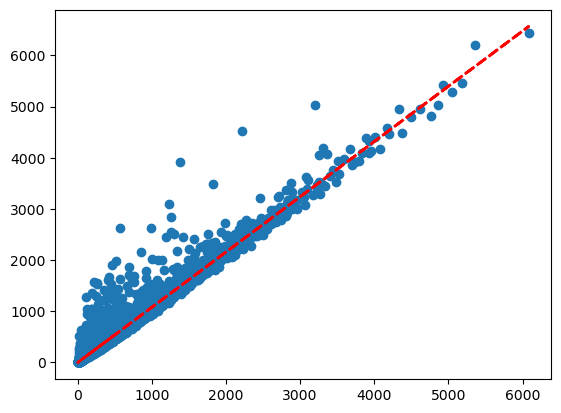

In [15]:
a, b = np.polyfit(data_notnull['households'], data_notnull['total_bedrooms'], 1)
plt.scatter(x=data_notnull['households'], y=data_notnull['total_bedrooms'])
plt.plot(data_notnull['households'], a*data_notnull['households']+b, color='red', linestyle='--', linewidth=2);

In [16]:
# Create the new column and binary indicator to note when total_bedrooms was imputed 
data['total_bedrooms_imp'] = 0
data.loc[null_rows.index,'total_bedrooms_imp'] = 1
# Perform the imputation and insert into the necessary cells
data.loc[null_rows.index,'total_bedrooms'] = round(data.loc[null_rows.index,'households']*a + b,0)

Now that we've done the imputation, let's look at the boxplot for `total_bedrooms`

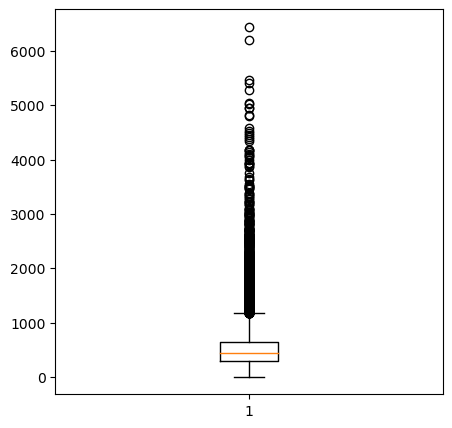

In [17]:
# Box plots, which won't include ocean proximity
plt.figure(figsize=(5,5))
plt.boxplot(data['total_bedrooms']);

Again, lots of outliers here.  We'll do some scaling on this, and we'll use a scaler that can handle data with lots of big outliers. For now, let's take a closer look at the values within the `ocean_proximity` column.

In [18]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

We've got 5 different categories, and they are helpful in terms of description but it would be hard to assign an ordinal identifier for how they relate to actual proximity to water.  So, we'll elect for one-hot encoding, using the get_dummies method in pandas.

In [19]:
data = pd.get_dummies(data=data, columns=['ocean_proximity'])

Now let's look at how these values correlate to one another, and we'll pay specific attention to how they correlate with `median_income`

In [20]:
corr_matrix=data.corr()

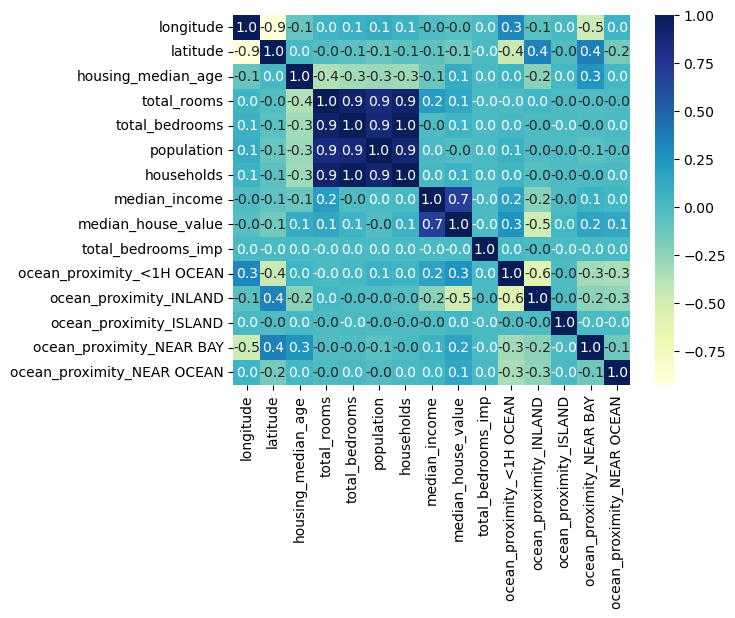

In [21]:
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, fmt=".1f");

There is fairly significant correlation among/between `total_rooms`, `total_bedrooms`, `population`, and `households` which makes sense as these are aggregate numbers for the housing tract and we would expect population sampled to increase as the number of households increase, and we would expect rooms to increase if there are more houses.  The highest correlation to home pricing though is with regard to `median_income`, which is also somewhat expected (as more wealthy families tend to live in more expensive houses).  Nothing groundbreaking.  Let's start to consider how we can scale the data and create new features for our models.

#### Data Scaling

Scaling is going to involve figuring out which columns' data we should/can rescale.  We don't want to lose info, but we also don't want to have certain features outweigh others simply becuase the nubmers associated with them are in a higher magnitude range to begin with.

In [22]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'total_bedrooms_imp', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

Which to scale?  We don't want to lose the inherent meaning related to geography that longitude and latitude provide, so we won't try to scale those.  We also won't try to scale the categorical dummies as these are binary and need to stay that way.

Housing median age we want to scale since it doesn't have comparable units (years).  The same is true for population, number of households, and median_income.  These don't have comparable units and so should be scaled so they don't pull too hard on the model we'll try to create.

The total number of rooms and total bedrooms we probably could go either way on, but since number of bedrooms will be smaller but pull more heavily on housing value, we'll rescale these too.

In [23]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler

`housing_median_age` is somewhat uniformly distributed with minimal outliers, as we saw before, so we'll use minmaxscaler.

Everything else kind of looks like it has heavy right-ward skew and many outliers, so we'll use RobustScaler on those.

In [24]:
data['housing_median_age'] = MinMaxScaler().fit_transform(data[['housing_median_age']])
data['total_rooms'] = RobustScaler().fit_transform(data[['total_rooms']])
data['total_bedrooms'] = RobustScaler().fit_transform(data[['total_bedrooms']])
data['population'] = RobustScaler().fit_transform(data[['population']])
data['households'] = RobustScaler().fit_transform(data[['households']])
data['median_income'] = RobustScaler().fit_transform(data[['median_income']])

Let's pause and see what the data looks like now.  Nothing to gather; just adding inline as a reference.

In [25]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88            0.784314    -0.733422       -0.871795   
1    -122.22     37.86            0.392157     2.924276        1.911681   
2    -122.24     37.85            1.000000    -0.388178       -0.698006   
3    -122.25     37.85            1.000000    -0.501691       -0.569801   
4    -122.25     37.85            1.000000    -0.294074       -0.441595   

   population  households  median_income  median_house_value  \
0   -0.899787   -0.870769       2.197582            452600.0   
1    1.316631    2.243077       2.186664            358500.0   
2   -0.714286   -0.713846       1.707732            352100.0   
3   -0.648188   -0.584615       0.967177            341300.0   
4   -0.640725   -0.461538       0.142854            342200.0   

   total_bedrooms_imp  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                   0                          0                       0   
1                   0                          0                       0   
2                   0                          0                       0   
3                   0                          0                       0   
4                   0                          0                       0   

   ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                         1   
1                       0                         1   
2                       0                         1   
3                       0                         1   
4                       0                         1   

   ocean_proximity_NEAR OCEAN  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

## Feature Engineering

It would be helpful if could create some new features that might better or more efficiently allow us to predict the median housing prices.  We'll focus on performing Principal Component Analysis as a way to add a few features.  But, to start, we might see if we can find a arithmetical combination of the exisitng features to see if that correlates well with our data. Let's look at current correlation to our target value.

In [26]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.050763
ocean_proximity_ISLAND        0.023416
total_bedrooms_imp           -0.000740
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

As we saw before, `median_income` has fairly strong correlation.  Few others are that great, although it is interesting to note fairly significant inverse correlation between the median housing price and `ocean_proximity_INLAND`.  Makes sense-- houses way out from the water are much less desirable in a state like California.

I suspect that there is something to be said of the ratio of `total_bedrooms` to `total_rooms`.  I would guess that if a house has more non-bedrooms, it could be an indicator that it is more expensive (people love extra bathrooms).  Let's add that and then re-run the correlation to see how it comes in.

In [27]:
data['bed/total'] = data['total_bedrooms'] / data['total_rooms']
corr_matrix=data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.050763
ocean_proximity_ISLAND        0.023416
bed/total                     0.002647
total_bedrooms_imp           -0.000740
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

Wow, I was way off.  This ratio of beds to total rooms has almost no correlation to the data.  In a more advanced dataset, we could see how this kind of value changed among clusters in the data to see if it provides additonal inforamtion to the model even if it doesn't show much correlation here.  I won't do that here and will remove this almost meaningless additional feature before moving forward.

In [28]:
data.drop(columns='bed/total', inplace=True)

#### Clusters

We can see if the unsupervised machine learning method of clustering the data might also help to add a useful feature to the dataset.  We'll start by copying the data and separating out the target values before we apply clustering via K-Means Clustering.

In [29]:
# Create new dataframes to separate out features and what will eventually be our target-- the median house value
X = data.copy()
y = X.pop('median_house_value')

In [30]:
# Create a set of features that don't invovle the one-hot encoded categories we added. 
cluster_features = list(corr_matrix['median_house_value'].sort_values(ascending=False).index)[1:7]
cluster_features2 = list(corr_matrix['median_house_value'].sort_values(ascending=False).index)[-2:]
cluster_features.extend(cluster_features2)
from sklearn.cluster import KMeans
# We'll go with 5 categories, somewhat arbitrarily.  In the future, this could be something we iterate through
kmeans = KMeans(n_clusters=5, n_init=10, random_state=0)
X_feng = X[cluster_features]
# Create a new feature for the cluster
X["Cluster"] = kmeans.fit_predict(X_feng)
X["Cluster"] = X["Cluster"].astype('category')

Kaggle provided useful code to visualize the clustering for each feature, plotted against our target value. I'll use that code here:

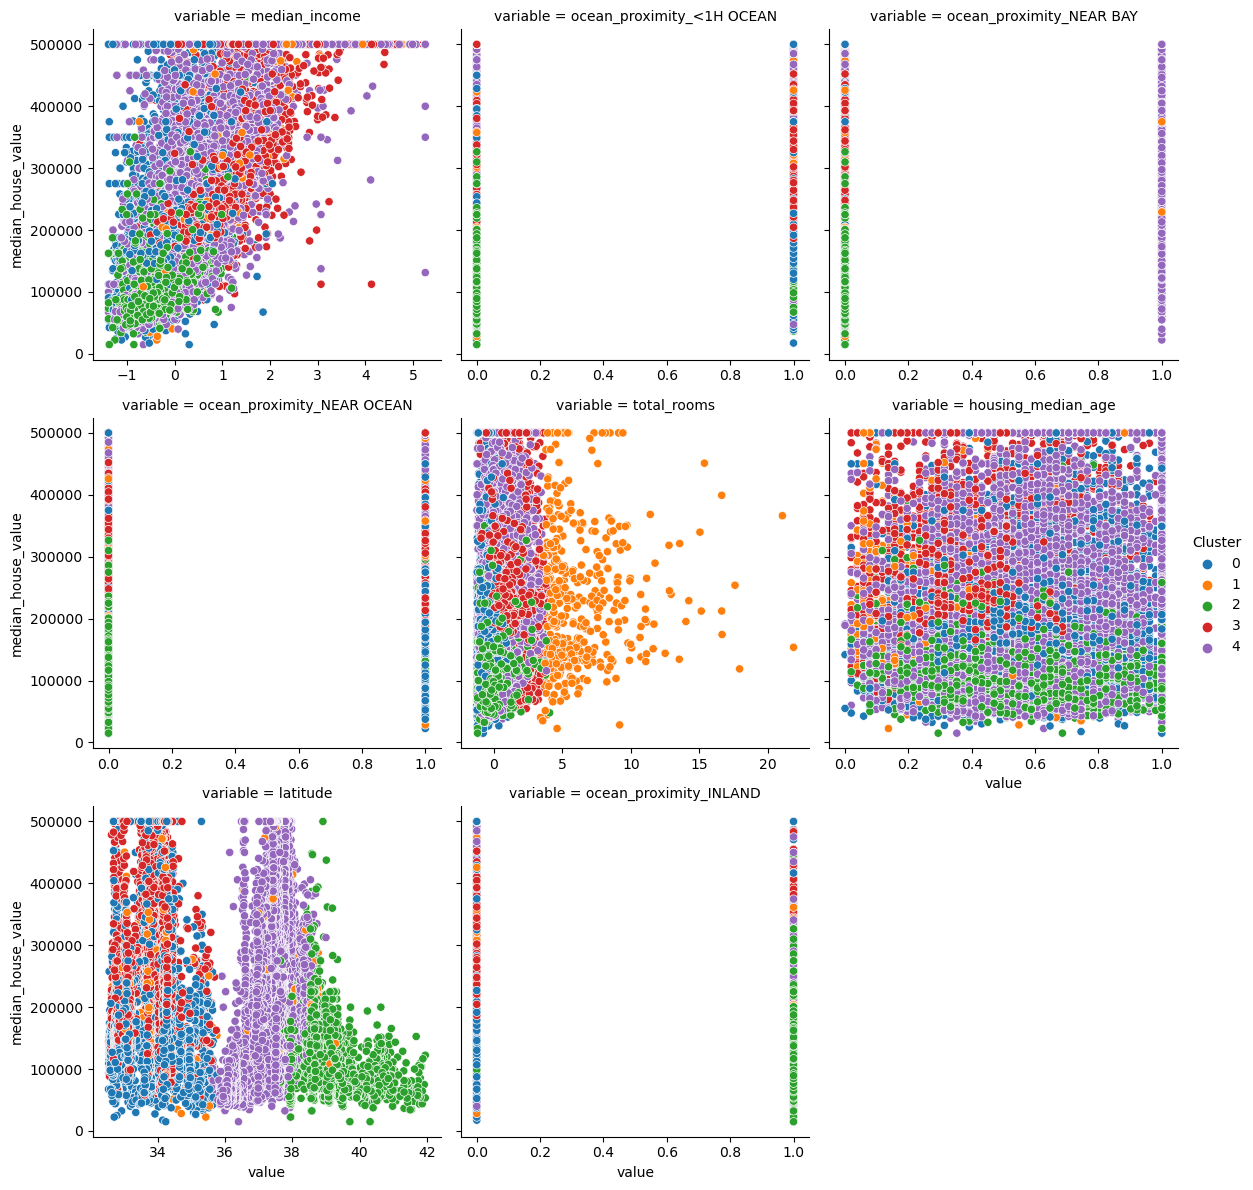

In [31]:
Xy = X.copy()
Xy["median_house_value"] = y
sns.relplot(
    x="value", y="median_house_value", hue="Cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=Xy.melt(
        value_vars=cluster_features, id_vars=["median_house_value", "Cluster"],
    ),
);

There isn't a lot here that is helpful for the clusters in terms of recognizing clear distinctions among the features and the median housing price.  We'll keep the clusters for our model as it doesn't add much to the computation.  

#### PCA

The last thing we'll do is Principal Component Analysis.  We'll use the features from our feature set that have float data.

In [32]:
from sklearn.decomposition import PCA

In [33]:
# Select only feautures that are floats
pca_features = X.select_dtypes(include=['float'])
X_pca = X.loc[:, pca_features.columns]
pca = PCA()
X_pca = pca.fit_transform(X_pca)
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
loadings = pd.DataFrame(pca.components_.T,columns= [f"PC{i+1}" for i in range(X_pca.shape[1])],
                        index=pca_features.columns)
X = X.join(X_pca)

We can look at the loadings and the explained variance for each feature and how it is applied to the PCA features to see what the most important factors were

In [34]:
loadings

PC1       PC2       PC3       PC4       PC5  \
longitude           0.671676 -0.118245 -0.156095 -0.667627  0.156606   
latitude           -0.720434  0.123614 -0.138075 -0.615193  0.172088   
housing_median_age -0.008850 -0.034070 -0.020229  0.147563 -0.036800   
total_rooms         0.077313  0.520492  0.206298 -0.281730 -0.208667   
total_bedrooms      0.084461  0.492102 -0.098592 -0.020021 -0.393812   
population          0.098813  0.470304 -0.099412  0.223028  0.831224   
households          0.081683  0.484570 -0.073041  0.115777 -0.196863   
median_income       0.014172  0.022499  0.942689 -0.105439  0.127229   

                         PC6       PC7       PC8  
longitude           0.166368  0.109518 -0.024090  
latitude            0.169381  0.098171 -0.015000  
housing_median_age -0.023895  0.986355  0.041903  
total_rooms        -0.732568  0.045364 -0.137565  
total_bedrooms      0.319000 -0.017773  0.695281  
population         -0.030420  0.006378  0.132384  
households          0.475187  0.032073 -0.688617  
median_income       0.279133  0.045051  0.058140

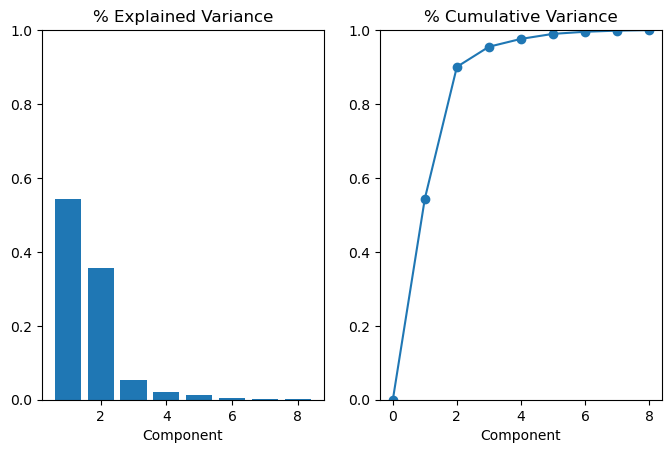

In [35]:
fig, axs = plt.subplots(1, 2)
n = pca.n_components_
grid = np.arange(1, n + 1)
evr = pca.explained_variance_ratio_
axs[0].bar(grid, evr)
axs[0].set(
    xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
)
cv = np.cumsum(evr)
axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
axs[1].set(
    xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
)
fig.set(figwidth=8, dpi=100);

The first two components are the most significant, and there is a precipitous dropoff for contributoin after that.  We'll keep them all in our model for now as there aren't that many extra features we've added.

## Model Building

Our goal is predict the median housing price, so we'll focus on linear regression models for now.  Other good choices tend to SVC, XGBoost, and some neural network options, but I'll use a subset of the options for simplicity here.  We'll also employ GridSearch and Cross-Validation to see if we can tune the parameters to create a model that scores fairly well.

In [36]:
# Import necessary libraries/packages, modules, classes
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

Let's break the data up into training data as well as validation data that we'll score on for model selection.  Then we can create a base models, identify a set of parameters to perform gridsearch on, and try them out (i.e., score them).  First we'll split up the data.

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

Initiate the regression models/estimators.

In [38]:
linreg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
# svc = SVC()
tree = DecisionTreeRegressor()
randfor = RandomForestRegressor()
gbdt = GradientBoostingRegressor()
regressors = [linreg,
              ridge,
              lasso,
#               svc,
              tree,
              randfor,
              gbdt]
regressor_types = [str(model) for model in regressors]

Now we'll create dictionaries for our parameter values and zip these up with their models into a dictionary keyed on the naem of the model.

In [39]:
# Define the dictionaries for each regressor model
linreg_params = {}
ridge_params = {'alpha':[0.001, 0.01,0.1],
                'solver':['lbfgs', 'cholesky', 'sparse_cg', 'auot']}
lasso_params = {'alpha':[0.001, 0.01,0.1]}
# svc_params = {'kernel':['linear','polynomial'],
#               'gamma': [0.1, 1],
#               'C':[0.1, 1]}
tree_params = {'max_depth':[2, 3, 4, 5, 6]}
randfor_params = {'max_features':list(range(len(X.columns)//4,len(X.columns),5)),
                  "n_estimators":[10,25,50,100]}
gbdt_params = {'learning_rate':[0.001,0.01,0.1],
               'max_depth':[2,4,8,20,50]}
params_grids = [linreg_params,
                ridge_params,
                lasso_params,
#                 svc_params,
                tree_params,
                randfor_params,
                gbdt_params]
model_params = dict(zip(regressor_types,params_grids))

Finally, we'll perform grid search and three-fold cross validation for each model/parameter set pairing.  We'll record the highest score for on the validation set as our "best" model.

In [40]:
# Setup gridsearchcv parameters.
# Three folds
cv=3
best_val_score = 0
best_model = None
for model in regressors:
    model_type = str(model)
    params_grid = model_params[model_type]
    print(model_type)
    grid = GridSearchCV(model, param_grid=params_grid, scoring='r2', cv=cv, n_jobs=-1).fit(X_train, y_train)
    print('Best (Training) Score:', grid.best_estimator_.score(X_train, y_train))
    val_score = grid.best_estimator_.score(X_val,y_val)
    print('Validation Score:',val_score,'\n')
    # Save the best version on the validation data
    if val_score > best_val_score:
        best_val_score = val_score
        best_model = grid.best_estimator_

LinearRegression()
Best (Training) Score: 0.6463252069452605
Validation Score: 0.6468431331502704 

Ridge()
Best (Training) Score: 0.6463366730141884
Validation Score: 0.6468429558906814 

Lasso()
Best (Training) Score: 0.646336821063056
Validation Score: 0.6468426919912472 

DecisionTreeRegressor()
Best (Training) Score: 0.727283081590985
Validation Score: 0.7074697921788987 

RandomForestRegressor()
Best (Training) Score: 0.9745031156283503
Validation Score: 0.8305837955007785 

GradientBoostingRegressor()
Best (Training) Score: 0.9585409637109209
Validation Score: 0.8418371085400222 



In [48]:
print("Best Model:",best_model)
print("Best Validation Score:",round(best_val_score,4))

Best Model: <bound method BaseEstimator.get_params of GradientBoostingRegressor(max_depth=8)>
Best Validation Score: 0.8418


It appears our best model is our **Gradient Boosted Decision Tree with max depth set to 8** (with default parameters otherwise [e.g., learning rate = 0.1]).  The score on validation data was **0.8418**, which is a respectable score but there is likely room for improvement.  We could employ new models, and/or increase the paramter grid through which we were searcing, or better engineer features or prepare the ones we have for analysis.